# 第一集 方程组的几何解释

第一集讲解线性代数的基础，求解方程组。
通过三种方式表述求解过程：
行图像（row picture），列图像(column picture)，矩阵形式(matrix form)
下面开始举例：

$\begin{cases}2x&-y&=0 \\-x&+2y&=3\end{cases}$ 
$\quad$用矩阵表述为 $\begin{bmatrix}2&-1\\-1&2\end{bmatrix}
$ $\begin{bmatrix}x\\y\end{bmatrix}$=$\begin{bmatrix}0\\3\end{bmatrix}$ $\quad$简写为 $Ax=b$

### 关于例子的行图像

我们熟悉的，一个方程表示一条直线，那么我们就在$xy$轴上画出这个方程组所表示的两条直线,两条直线的交点就是方程组的解

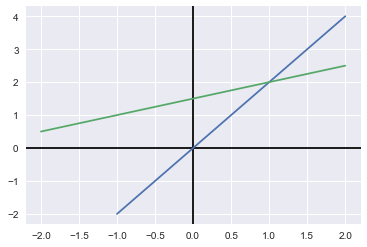

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

fig = plt.figure()
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')
plt.plot([-1,2],[-2,4] ,[-2,2],[0.5,2.5])
plt.draw()

一条直线代表一个线性方程(linear equation)，其中教授讲的一句This is a $linear$ $equation$ and that word $linear$ got the letters for line in it.可以让我们更好的理解线性方程

 $\backslash$

### 关于例子的列图像

注意，列图像才是关键(key point)，我们看矩阵的列，得到一种方程组的表达方式：
$x\begin{bmatrix}2\\-1\end{bmatrix}$+$y\begin{bmatrix}-1\\2\end{bmatrix}$=$\begin{bmatrix}0\\3\end{bmatrix}$
矩阵A的各列在左侧，右侧则是$b$，那么该方程的目的是什么呢？

就是让我们找到如何将左侧的两个向量线性组合成右侧的向量
方程左侧就是Linear combination of columns

下面做列图像：

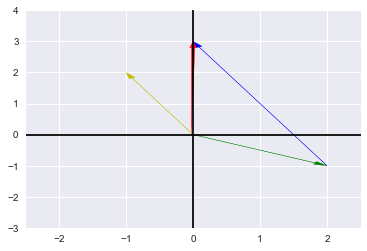

In [39]:
%matplotlib inline
from functools import partial

fig = plt.figure()
#设置x,y轴
plt.axhline(y=0, c='black')
plt.axvline(x=0, c='black')

#获取当前的axes instand
ax = plt.gca()

#设置x,y轴的显示范围
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-3, 4)

#得到箭头向量??这一步还需看接口定义
arrow_vector = partial(plt.arrow, width=0.001, head_width=0.1, head_length=0.2, length_includes_head=True)

arrow_vector(0, 0, 2, -1, color='g')
arrow_vector(0, 0, -1, 2, color='y')
arrow_vector(2, -1, -2, 4, color='b')
arrow_vector(0, 0, 0, 3, width=0.05, color='r')

plt.draw()

其中绿色矢量表示$col1$,黄色矢量表示$COL2$,蓝色矢量表示$col1$+$2col2$这个过程，红色箭头就是$col1$+$2col2$后的结果

想一下，$x\begin{bmatrix}2\\-1\end{bmatrix}$+$y\begin{bmatrix}-1\\2\end{bmatrix}$=$\begin{bmatrix}0\\3\end{bmatrix}$中选取所有的x和y，即所有的线性组合，结果会怎样呢？

结果是我们将得到任意的右侧向量$b$，这两个向量的组合会不满整个坐标空间(plane).

下面进入3维情况，3个方程3个未知量，举例如下方程组：

$\begin{cases}2x&-y&=0 \\-x&+2y&-z&=-1\\-3y&+4z&=4\end{cases}$ 

方程左侧的系数可以用矩阵$A$表示 ：$A=\begin{bmatrix}2&-1&0\\-1&2&-1\\0&-3&4\end{bmatrix}$

右侧向量用矩阵$b$表示：$b=\begin{bmatrix}0\\-1\\4\end{bmatrix}$

画这个3维方程组的$Row$ $Picture$在一个三维坐标系上，一个线性方程的解就是这个空间上的一个plane，3个方程就是3个plane,这种情况下3个plane相交在一点，就是这个方程组的解

用column picture来看这个问题，我们得到如下方程：

$x\begin{bmatrix}2\\-1\\0\end{bmatrix}$+$y\begin{bmatrix}-1\\2\\-3\end{bmatrix}$+$z\begin{bmatrix}0\\-1\\4\end{bmatrix}$=$\begin{bmatrix}0\\-1\\4\end{bmatrix}$

每个向量均为三维向量(three dimensional vector)，这里我们想知道通过怎样的线性组合得到右侧向量

类似于22维向量，在3维空间里做3个对应向量，由于教授的"精心"设计，其实解的答案很明显，就是$(0,0,1)$

我们其实已经可以看到，在3维情况下，通过作行图像，已经比较难直观的得到解了，列图像有时候也不一定会得到
，下一节我们将讲解的$消元法$，将是求解的系统方法(systematic way)，所有人、以及不管怎么复杂的软件，都是通过这种方法求解

现在再回到picture ，我们考虑不同的右侧向量,将$b$变为左侧第一列与第二轮的和，方程变为
$x\begin{bmatrix}2\\-1\\0\end{bmatrix}$+$y\begin{bmatrix}-1\\2\\-3\end{bmatrix}$+$z\begin{bmatrix}0\\-1\\4\end{bmatrix}$=$\begin{bmatrix}1\\1\\-3\end{bmatrix}$

这时方程的解是什么呢？非常明显，就是$(1,1,0)$。

那么现在考虑所有的右侧向量$b$，产生一个问题：对任意$b$，是否都能求解$Ax=b$？

用线性组合(linear combution)的语言来问这个问题：列的线性组合是否能覆盖整个空间

对于我们举的例子，矩阵$A$,答案是YES，但是另一些矩阵答案是否定的

那么什么时候,3个向量无法通过线性组合得到向量$b$，如果col3正好等于col1与col2的和，这种情况下答案就是否定
，有解的右侧向量必然处在col1与col2两个向量所确定的plane上，而不处在这个plane上的$b$方程组将无解

这种情况称作奇异(a singular case),矩阵$A$非可逆(not invertible)，不是任何$b$都有解

下面我们可以考虑9维的情况，假设向量有9个变量，假设有9个方程，9个未知量，对任意$b$方程组是否有解?
这同样取决于这9个列向量，有时答案是YES，比如取随机矩阵(random matrix),答案就是肯定的，MATLAB中使用随机命令(random command)得到的矩阵一定都是好用的，non-singular,invertible,all beautiful。

但是如果选取相互不独立(independent)的9个向量，其中1列是其他8列的组合，那么这列将毫无贡献

大家能否想象在9维空间里的9个向量的组合，这是线性代数中必须掌握的中心内容
，虽然无法具象化，但是后面我们将能够做到，9个向量及其组合，如果有一列毫无贡献
我们将只能在覆盖9维空间的8维空间的所谓$平面$上展开求解

非奇异矩阵，
下面将如何用矩阵乘以向量
$Ax=b$
举例：

$\begin{bmatrix}2&5\\1&3\end{bmatrix}$$\begin{bmatrix}1\\2\end{bmatrix}$

有两种方法

取列计算：取1个第一列和2个第二列之和就是$1\begin{bmatrix}2\\1\end{bmatrix}$+$2\begin{bmatrix}5\\3\end{bmatrix}$=$\begin{bmatrix}12\\7\end{bmatrix}$

另一种方法，取行：
每一行点乘向量$x$：$\begin{bmatrix}\begin{bmatrix}2&5\end{bmatrix}*\begin{bmatrix}1\\2\end{bmatrix}\\\begin{bmatrix}1&3\end{bmatrix}*\begin{bmatrix}1\\2\end{bmatrix}\end{bmatrix}$=$\begin{bmatrix}(2*1+5*2)\\(1*1+3*2)\end{bmatrix}$=$\begin{bmatrix}12\\7\end{bmatrix}$

对于$Ax=b$，教授建议我们用取列的方法来考虑，
$Ax$是对矩阵$A$各列的线性组合!!( $Ax$ is a comb of columns of A )